**Table of Contents**
<div id="toc"></div>

# Importing DF

In [916]:
from scipy.constants import physical_constants as phy
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import math
from scipy import stats
import scipy.constants as sc
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
import statsmodels.formula.api as sm
import seaborn as sns
sns.set(color_codes = True)
np.random.seed(1974)
ev = phy["joule-electron volt relationship"]
bolts = phy["Boltzmann constant in eV/K"]
k = bolts[0]
# Let printing work the same in Python 2 and 3
from __future__ import print_function

In [917]:
df1 = pd.read_csv('../Data/snail_respiration_BK.csv', sep =',')


8.6173303e-05

In [865]:
df1.head()

,trial,system,date_time,year,species,stream,stream_temp,exp_temp,chamber,mass,resp,start_status,end_status,comm_1,comm_2,comm_3,confidence_id,outlier,remove
0,73,old,7.6_1300,2016,Radix balthica,11,5.6,5,3,3.014683,0.010438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74,old,7.6_1400,2016,Radix balthica,11,5.6,5,3,3.014683,0.016002,NaN,NaN,"repeat of trial: 5 acute 7.6_1300_old, with re...",NaN,NaN,NaN,NaN,NaN
2,73,old,7.6_1300,2016,Radix balthica,11,5.6,5,4,11.716683,0.039203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,74,old,7.6_1400,2016,Radix balthica,11,5.6,5,4,11.716683,0.042461,NaN,NaN,"repeat of trial: 5 acute 7.6_1300_old, with re...",NaN,NaN,NaN,NaN,NaN
4,73,old,7.6_1300,2016,Radix balthica,11,5.6,5,5,13.338753,0.042687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [866]:
df1["stream_temp"] = df1["stream_temp"].astype(str)

In [867]:
new_df = df1[["stream", "stream_temp", "exp_temp", "mass","resp"]]

In [868]:
new_df.head()

,stream,stream_temp,exp_temp,mass,resp
0,11,5.6,5,3.014683,0.010438
1,11,5.6,5,3.014683,0.016002
2,11,5.6,5,11.716683,0.039203
3,11,5.6,5,11.716683,0.042461
4,11,5.6,5,13.338753,0.042687


In [869]:
stream_11 = new_df[(new_df["stream"] == 11)]

In [870]:
stream_11

,stream,stream_temp,exp_temp,mass,resp
0,11,5.6,5,3.014683,0.010438
1,11,5.6,5,3.014683,0.016002
2,11,5.6,5,11.716683,0.039203
3,11,5.6,5,11.716683,0.042461
4,11,5.6,5,13.338753,0.042687
5,11,5.6,5,13.338753,0.076883
6,11,5.6,5,23.529307,0.366810
7,11,5.6,10,16.986706,0.198874
8,11,5.6,10,21.959874,0.143871
9,11,5.6,10,29.566405,0.227699


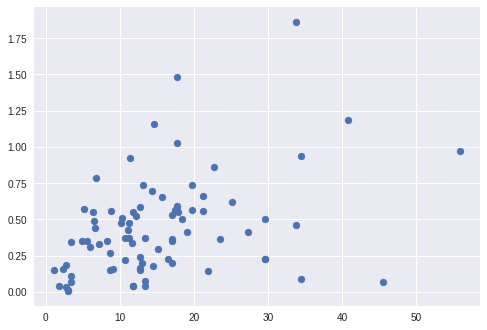

In [871]:
plt.scatter("mass", "resp", data=stream_11)

In [872]:
groups = df1.groupby(["stream_temp","exp_temp"])


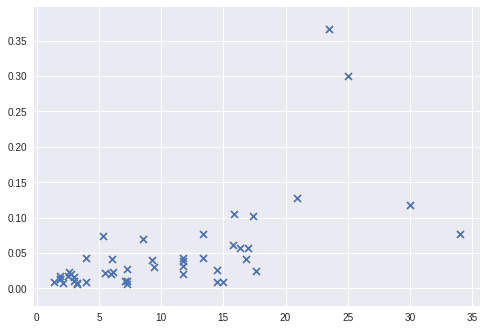

In [873]:
groups.head()
groups["exp_temp"].unique()
g = df1[(df1["exp_temp"] == 5)]

plt.scatter(g["mass"], g["resp"], marker = "x")
plt.show()

## Getting the hang of the data

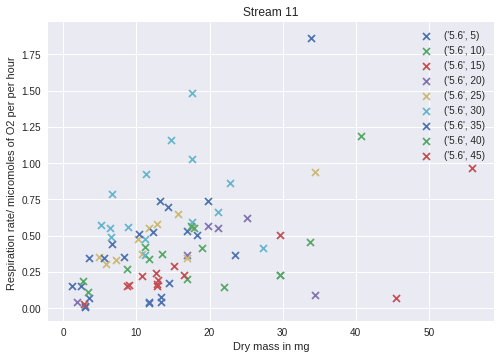

In [874]:
groups_s = stream_11.groupby(["stream_temp","exp_temp"])


# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups_s:
    ax.scatter(group["mass"], group["resp"], marker='x', label = name)
    ax.legend()

plt.title('Stream 11')
plt.ylabel('Respiration rate/ micromoles of O2 per per hour ')
plt.xlabel('Dry mass in mg')
plt.show()

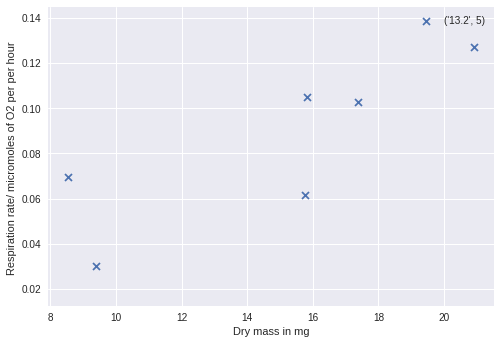

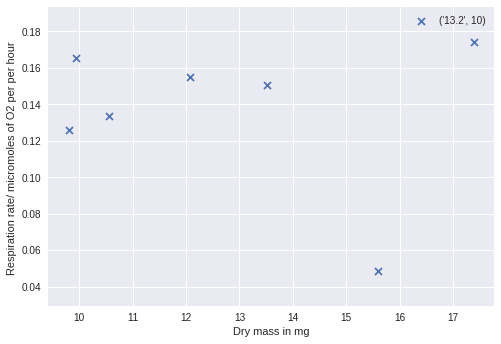

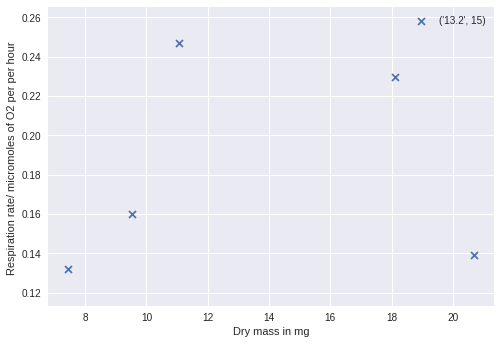

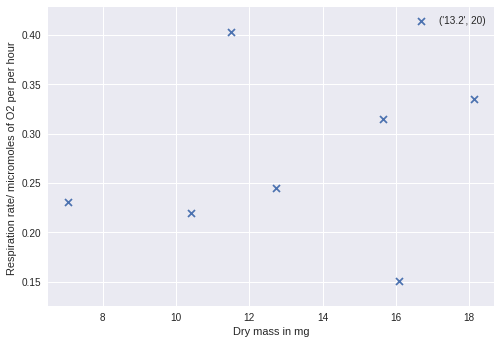

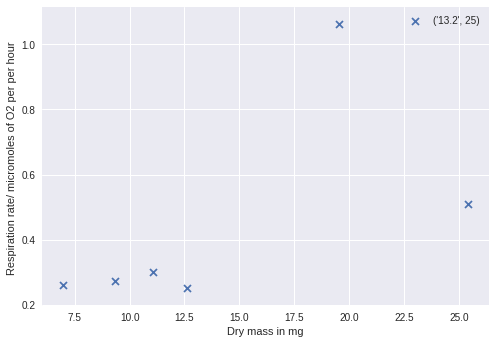

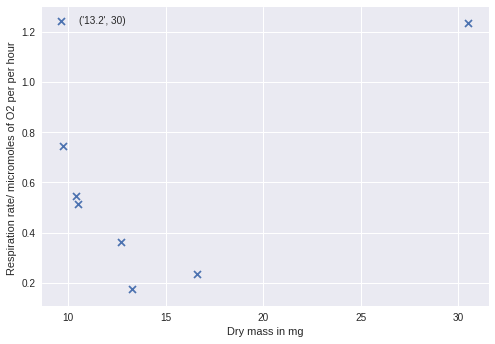

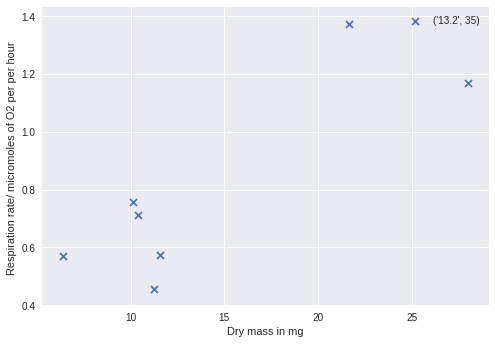

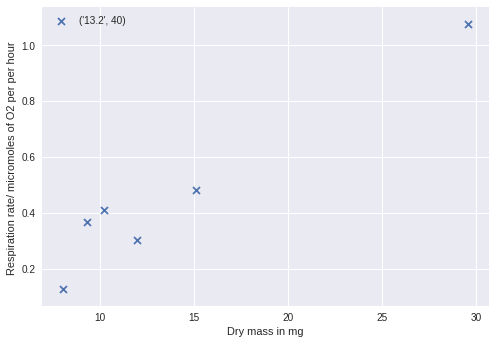

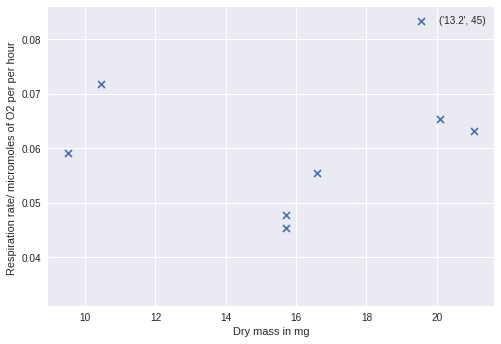

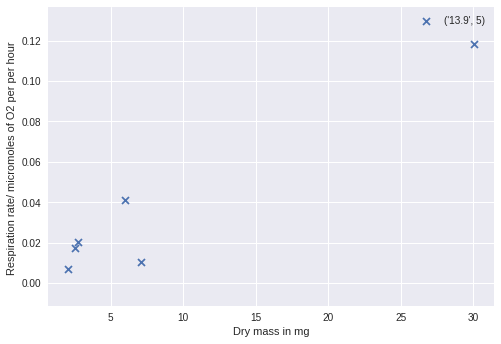

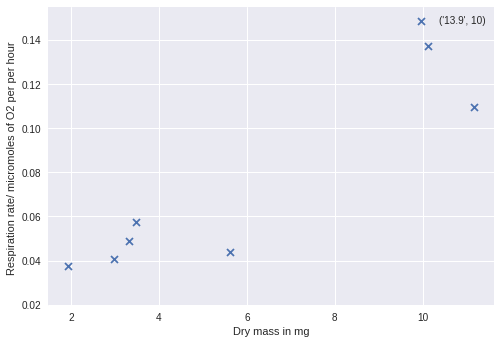

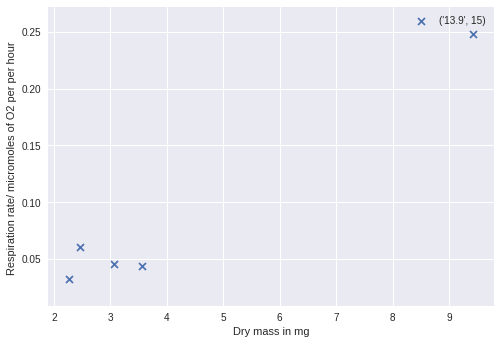

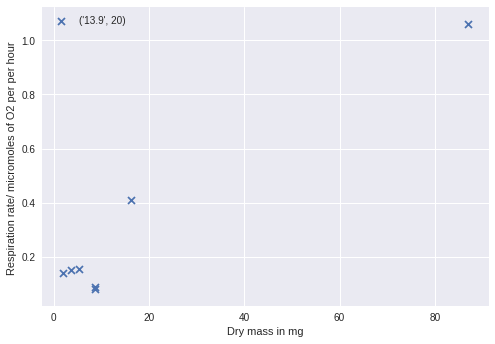

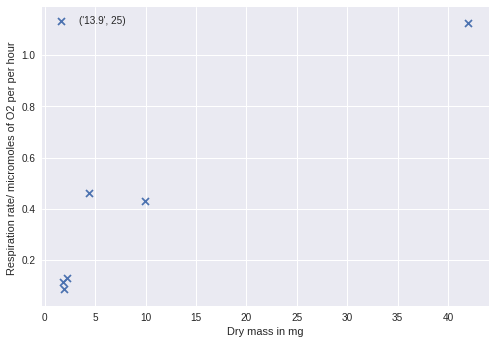

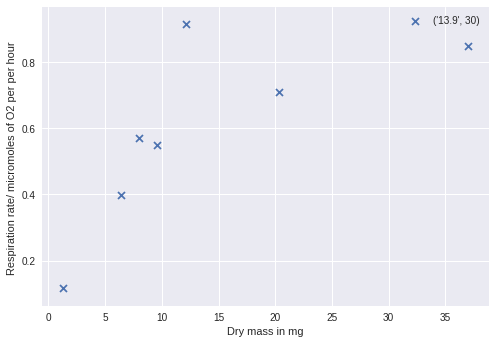

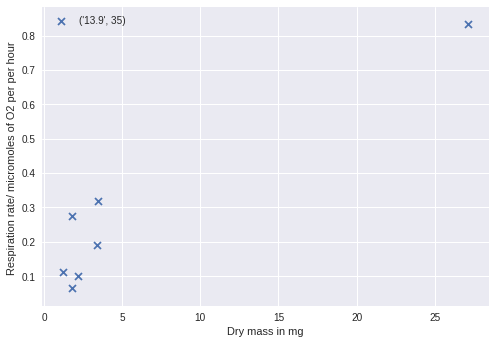

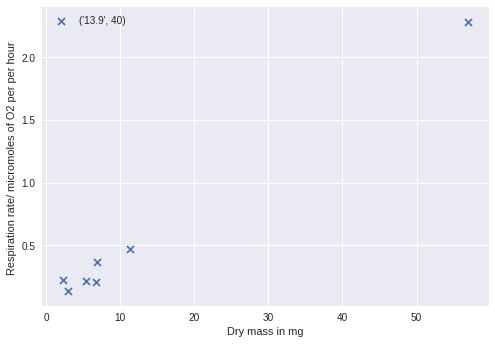

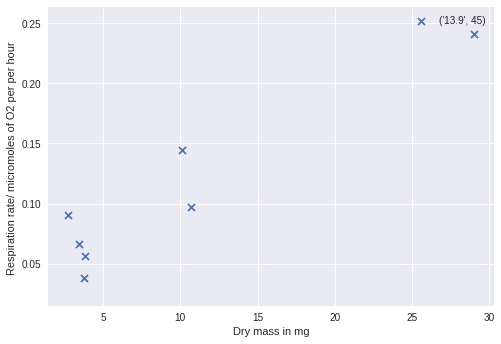

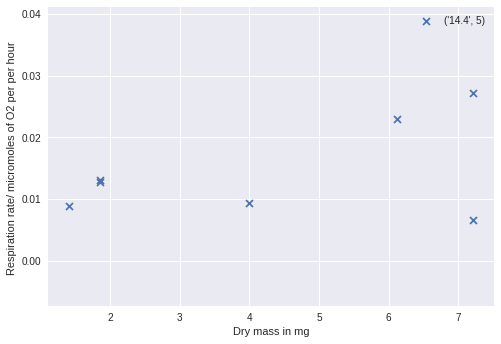

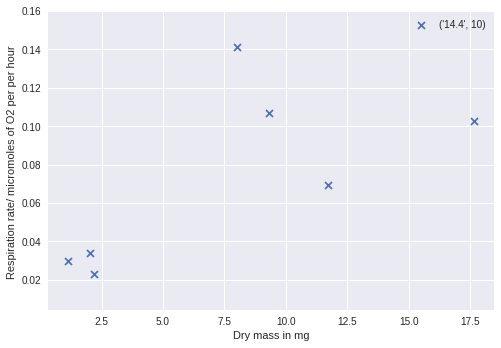

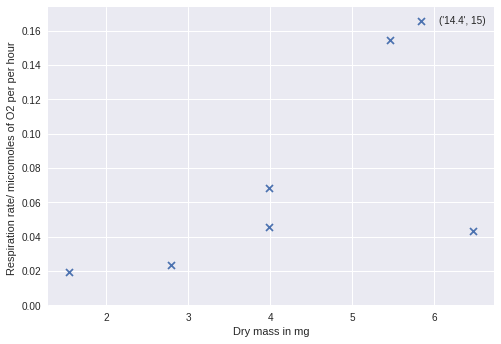

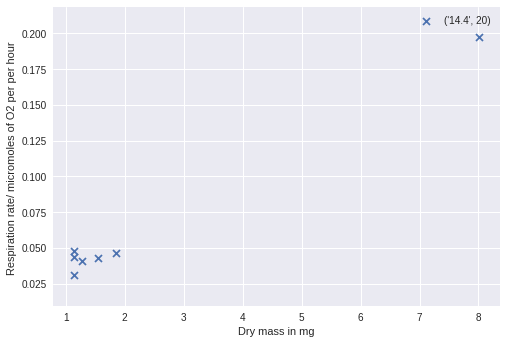

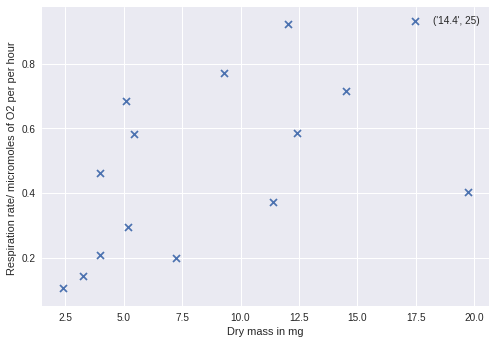

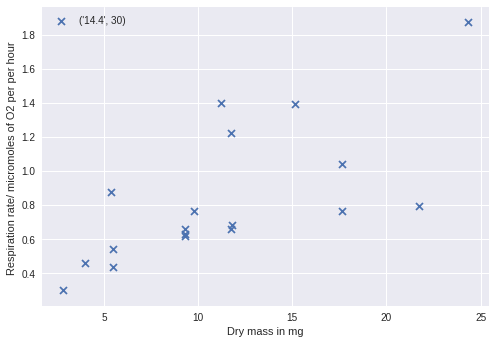

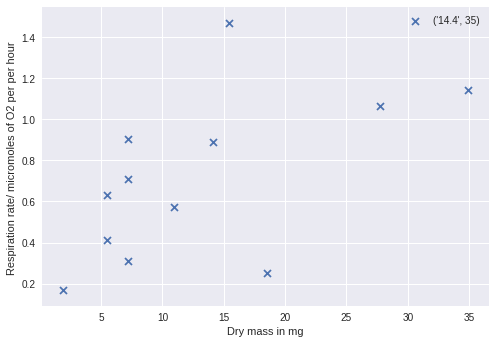

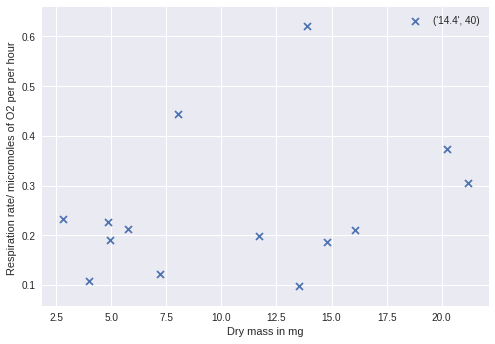

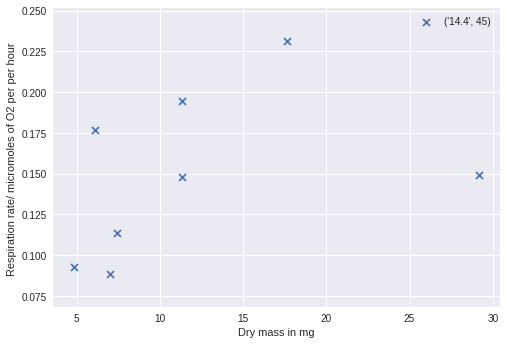

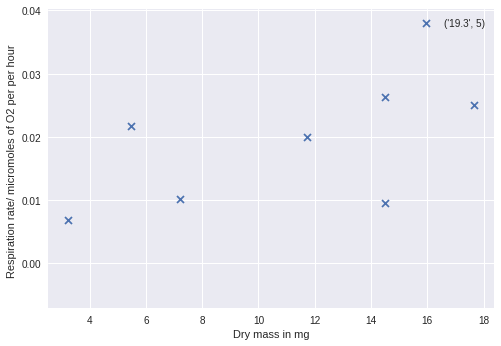

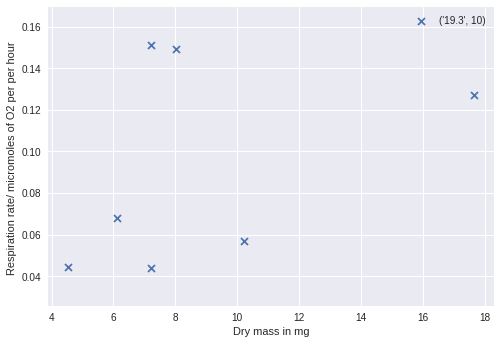

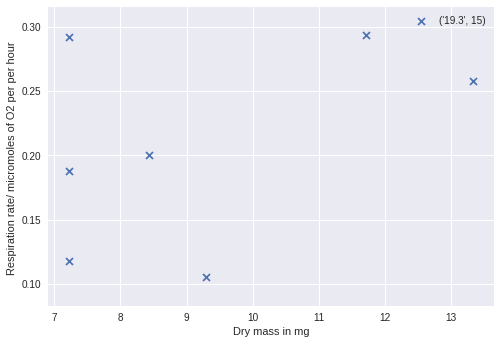

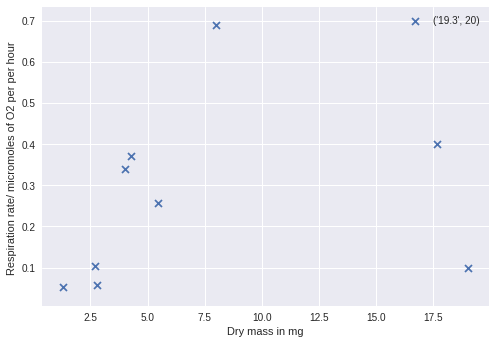

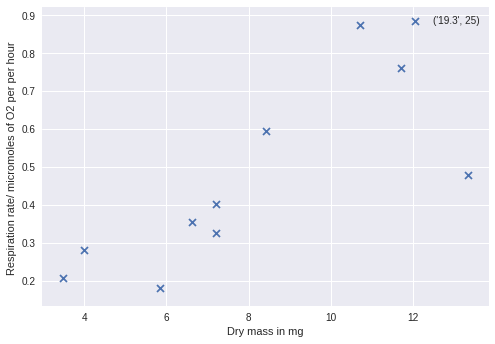

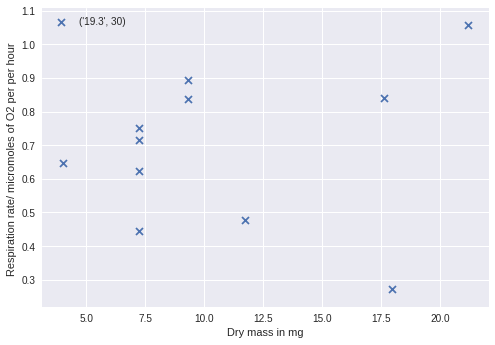

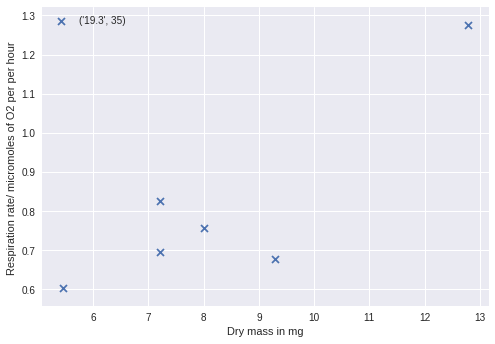

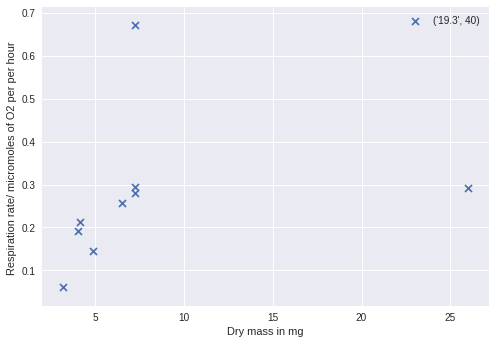

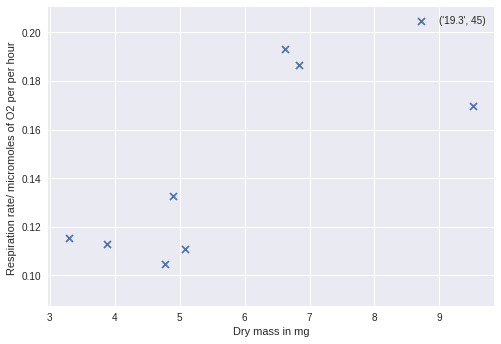

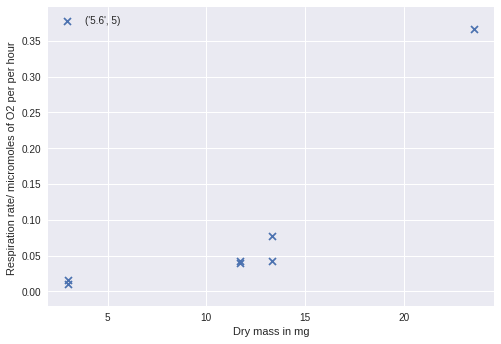

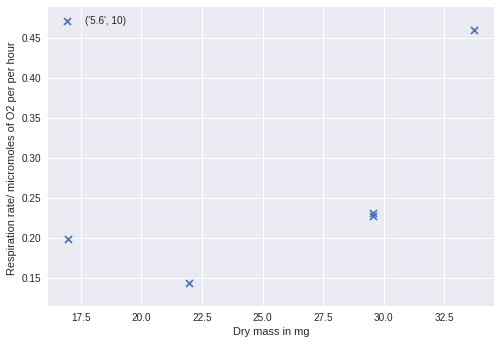

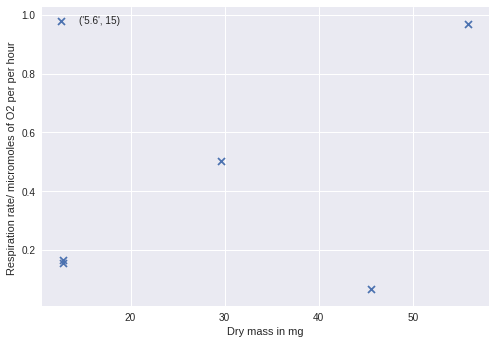

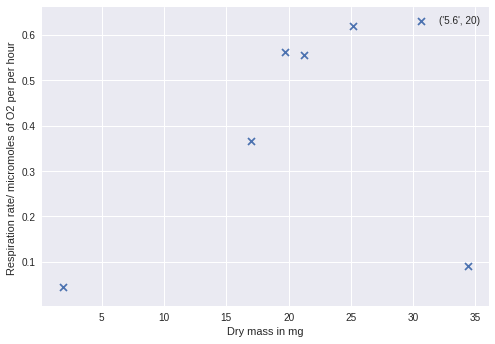

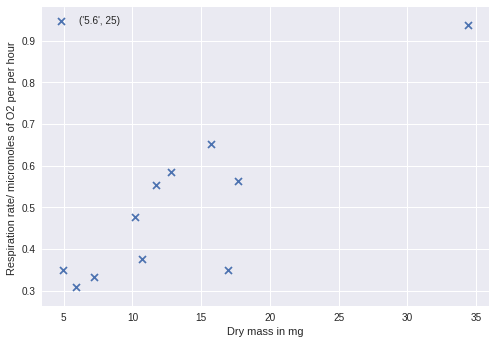

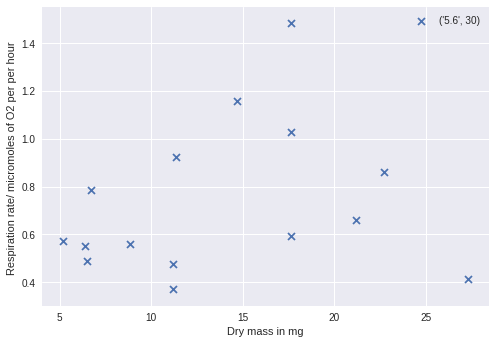

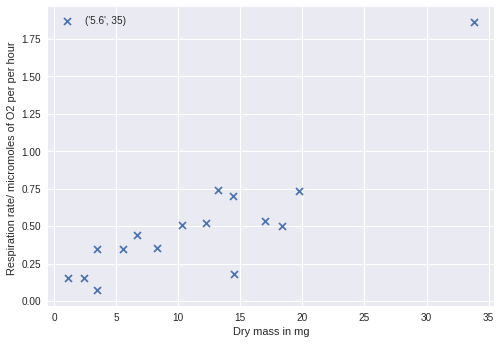

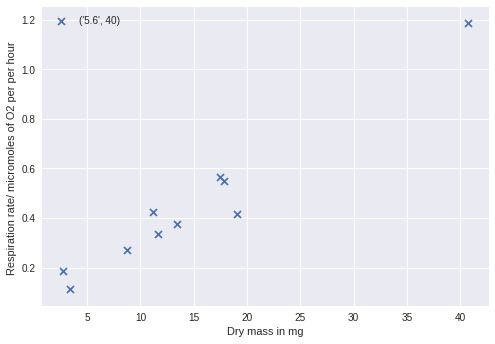

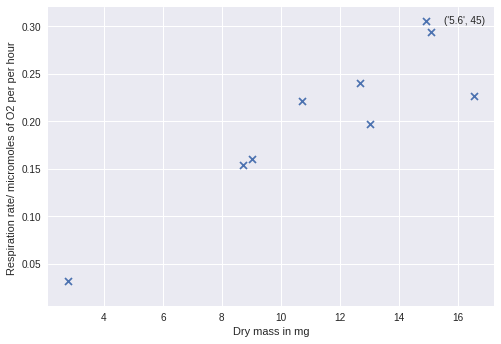

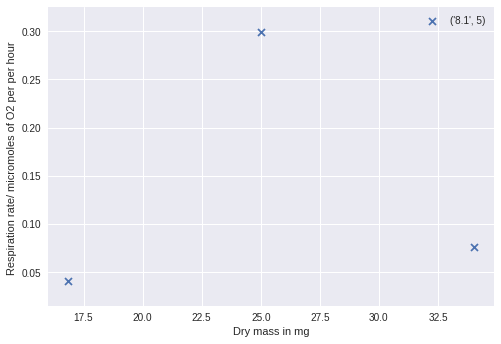

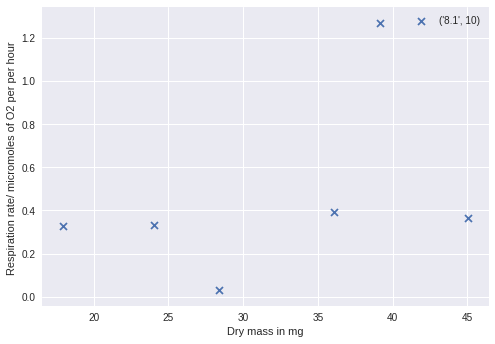

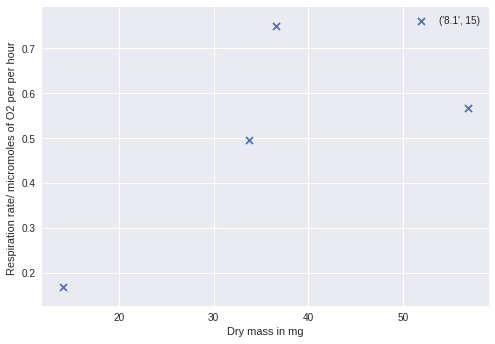

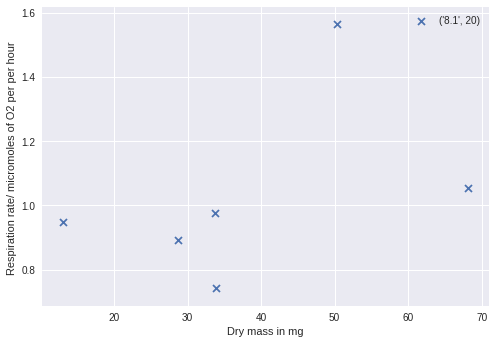

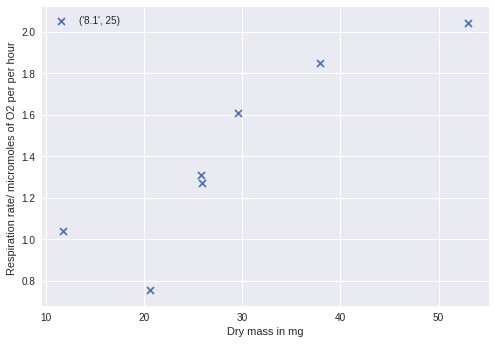

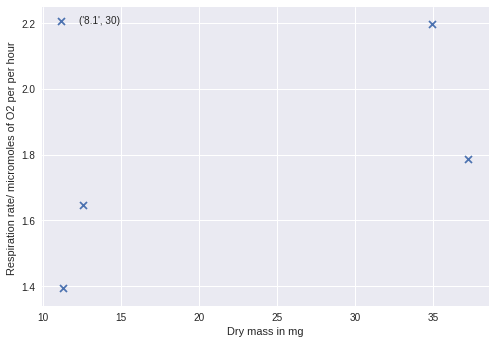

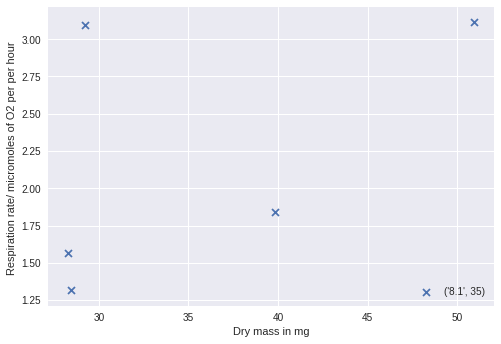

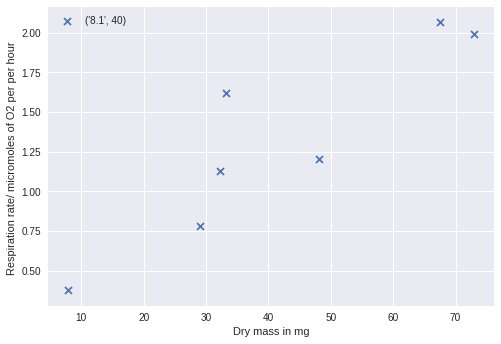

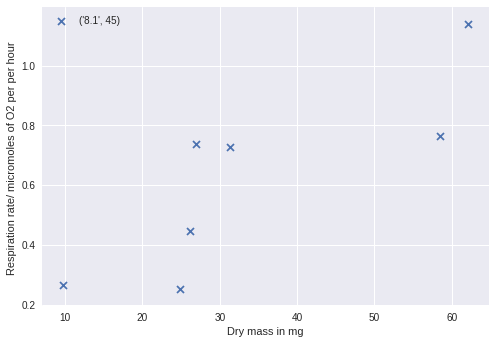

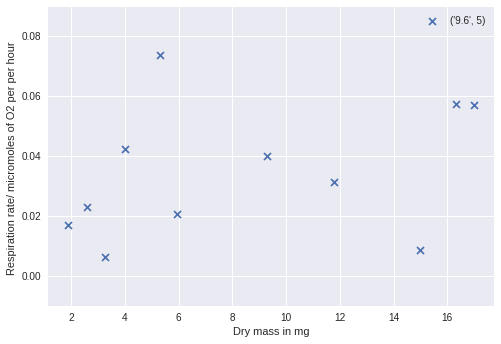

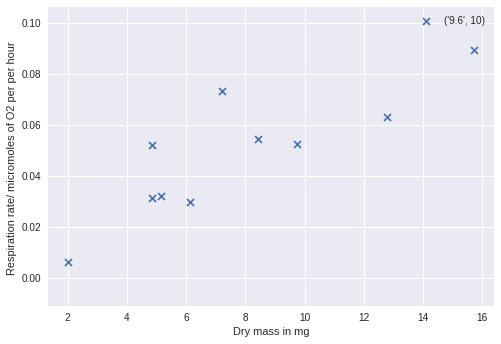

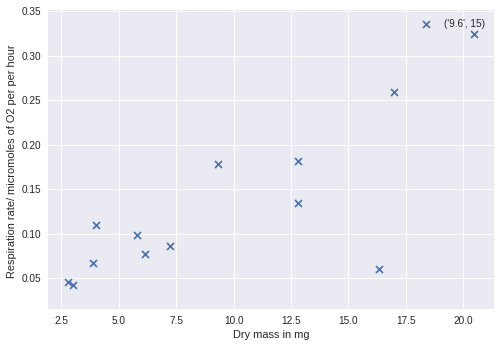

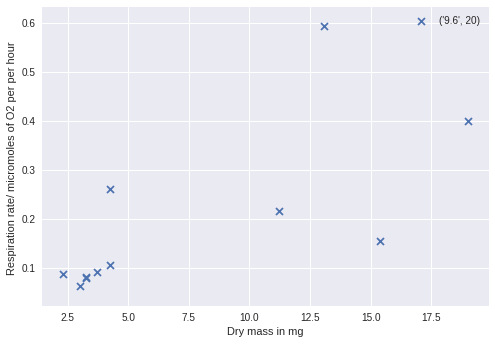

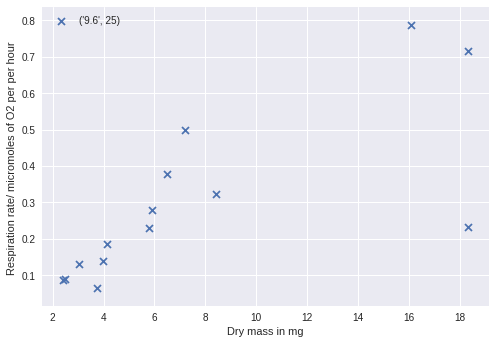

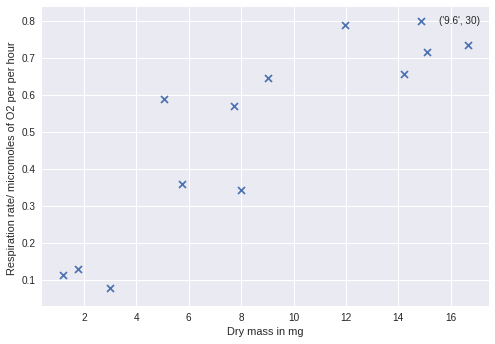

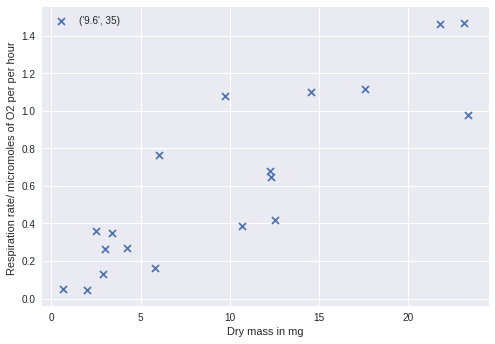

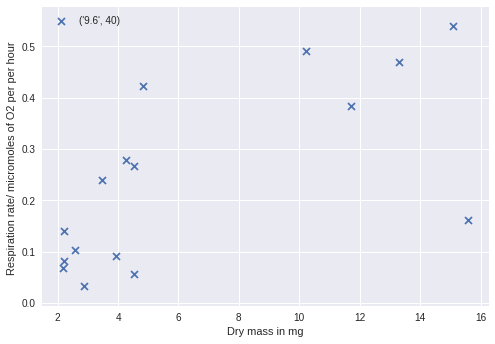

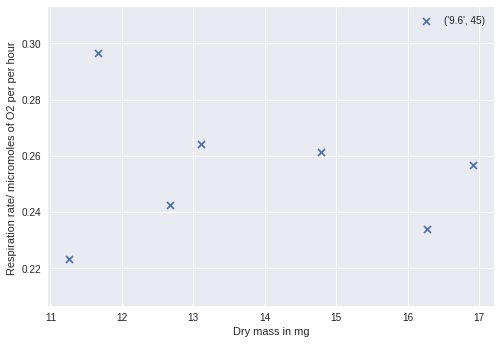

In [875]:
new_df_group = new_df.groupby(["stream_temp", "exp_temp"])
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in new_df_group:
    plt.scatter(group["mass"], group["resp"], marker='x',  label = name)
    plt.legend()
    plt.ylabel('Respiration rate/ micromoles of O2 per per hour ')
    plt.xlabel('Dry mass in mg')
    plt.show()

In [876]:
#fig.set_size_inches(18.5, 10.5)
#fig.savefig('../Results/stream_11.png', dpi=100)

## Adding new columns to df

In [919]:
# y = t - t0/ k t t0   t0 normally mean of t approx
workingdf = new_df.assign(Exp_Temp_K = new_df["exp_temp"] + 273.15)
workingdf = workingdf.assign(log_resp = lambda x: np.log((x.resp)))
workingdf = workingdf.assign(mass_g = lambda x: x["mass"]/1000)
workingdf = workingdf[(workingdf["exp_temp"] <= 30)]
workingdf = workingdf.assign(x1 = lambda x: ((x["Exp_Temp_K"] - 290.65)/(k*x["Exp_Temp_K"]*290.65)))
workingdf = workingdf.assign(x2 = lambda x: (1/(k * x["Exp_Temp_K"]) ))
workingdf = workingdf.assign(log_mass_resp = lambda x: np.log(x["resp"] * (x["mass_g"]**(-3./4))))
workingdf = workingdf.assign(lnmass = lambda x: np.log(x["mass_g"]))
workingdf = workingdf.assign(x3 = lambda x: (1/(x.Exp_Temp_K) * 1000))
M = workingdf["mass_g"]
T = workingdf["Exp_Temp_K"] 
b = 0.75/
power = (k * T)
workingdf

,stream,stream_temp,exp_temp,mass,resp,Exp_Temp_K,log_resp,mass_g,x1,x2,log_mass_resp,lnmass,x3
0,11,5.6,5,3.014683,0.010438,278.15,-4.562267,0.003015,-1.794270,41.720374,-0.209072,-5.804261,3.595182
1,11,5.6,5,3.014683,0.016002,278.15,-4.135015,0.003015,-1.794270,41.720374,0.218180,-5.804261,3.595182
2,11,5.6,5,11.716683,0.039203,278.15,-3.239007,0.011717,-1.794270,41.720374,0.096049,-4.446742,3.595182
3,11,5.6,5,11.716683,0.042461,278.15,-3.159176,0.011717,-1.794270,41.720374,0.175880,-4.446742,3.595182
4,11,5.6,5,13.338753,0.042687,278.15,-3.153868,0.013339,-1.794270,41.720374,0.083943,-4.317082,3.595182
5,11,5.6,5,13.338753,0.076883,278.15,-2.565466,0.013339,-1.794270,41.720374,0.672345,-4.317082,3.595182
6,11,5.6,5,23.529307,0.366810,278.15,-1.002910,0.023529,-1.794270,41.720374,1.809221,-3.749509,3.595182
7,11,5.6,10,16.986706,0.198874,283.15,-1.615086,0.016987,-1.057552,40.983656,1.441407,-4.075324,3.531697
8,11,5.6,10,21.959874,0.143871,283.15,-1.938837,0.021960,-1.057552,40.983656,0.925067,-3.818538,3.531697
9,11,5.6,10,29.566405,0.227699,283.15,-1.479730,0.029566,-1.057552,40.983656,1.161108,-3.521117,3.531697


## Visualising the data

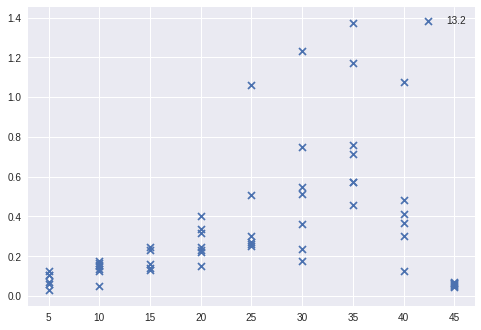

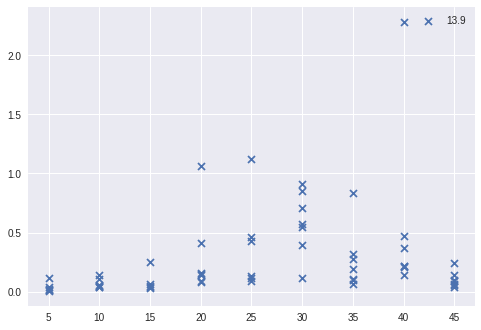

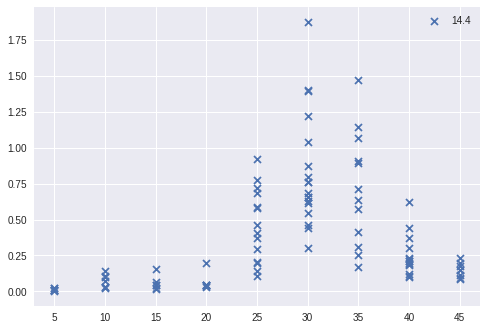

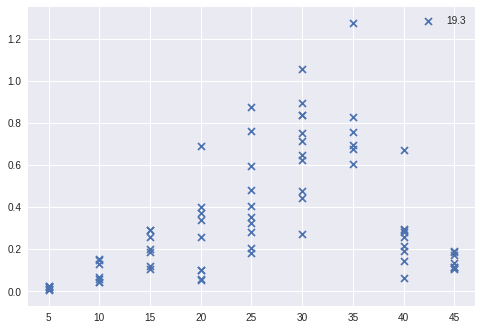

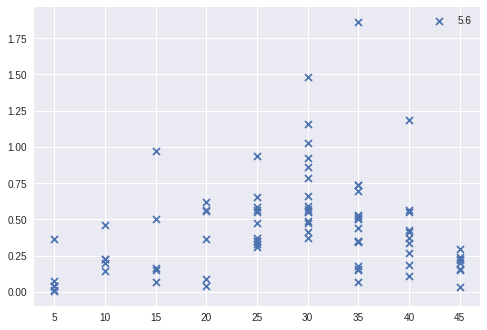

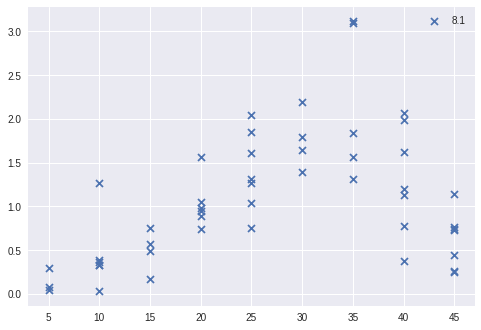

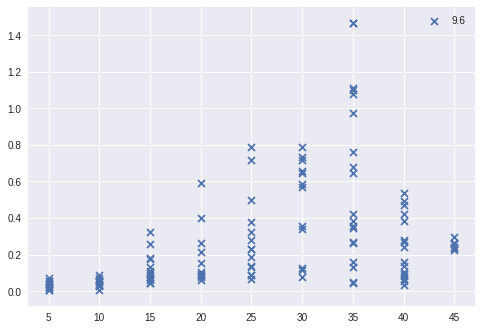

In [920]:
grouped_stream = new_df.groupby("stream_temp")

# Plot

for name, group in grouped_stream:
    plt.scatter("exp_temp", "resp", data=group,  marker='x', label = name)
    plt.legend()
    plt.show()
   

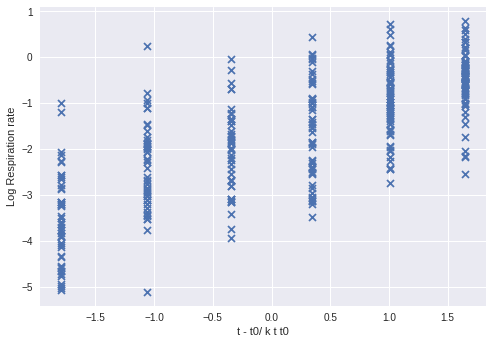

In [921]:
plt.scatter("x1", "log_resp", data=workingdf,  marker='x',  label = name)
plt.ylabel('Log Respiration rate')
plt.xlabel('t - t0/ k t t0')
plt.show()

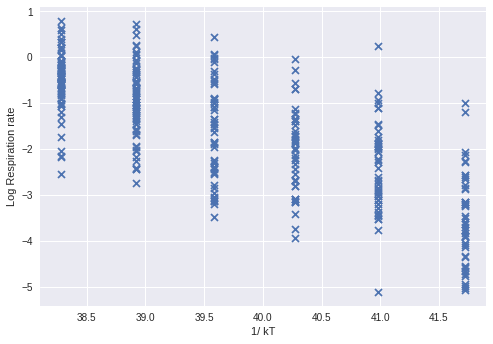

In [922]:
plt.scatter("x2", "log_resp", data=workingdf,  marker='x',label = name)
plt.ylabel('Log Respiration rate')
plt.xlabel('1/ kT')
plt.show()

# Linear Regression

## Plotting linear regression on x1

In [923]:
#result = sm.ols(formula="A ~ B + C", data=df).fit()
data = np.matrix(np.asarray(workingdf))
regr = linear_model.LinearRegression()
x, y = data[:,8], data[:,6]


In [924]:
regr.fit(x, y)

x1_slope, x1_intercept, x1_r_value, x1_p_value, x1_std_err = stats.mstats.linregress(x,y)
print (x1_slope)
print (x1_intercept)
print (x1_r_value **  2)

0.8352034479495607
-1.8135312205781622
0.561343768574


/home/abi/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/scipy/stats/_stats_mstats_common.py:116: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/abi/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/scipy/stats/_stats_mstats_common.py:118: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [925]:
print(regr.coef_, regr.intercept_)

[[ 0.83520345]] [-1.81353122]


In [926]:
predicted = cross_val_predict(regr, x, y, cv=10)

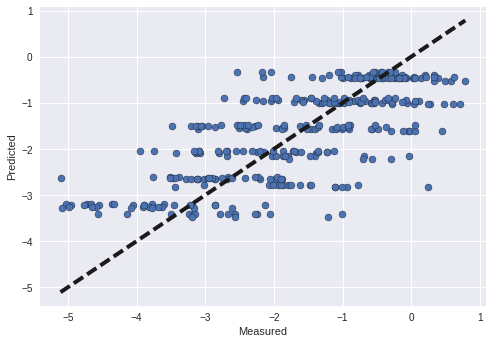

Coefficients: 
 0.83520344795
Intercept: 
 -1.81353122058
Mean squared error: 0.84
Variance score: 0.53


In [927]:
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


# The coefficients
print('Coefficients: \n', regr.coef_[0,0])
#Intercept
print('Intercept: \n', regr.intercept_[0])
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, predicted))

x1_coef = regr.coef_[0,0]
x1_intercept = regr.intercept_[0]

## Training the model - didn't use, not sure it worked? Ask

Coefficients: 
 0.857296504988
Intercept: 
 -1.79589378142
Mean squared error: 0.66
Variance score: -0.46


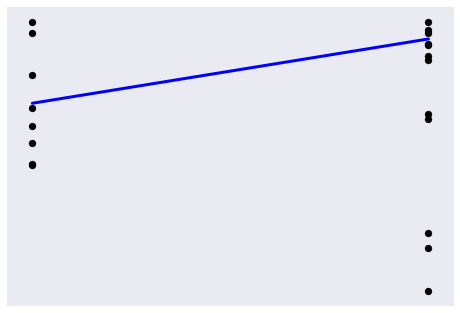

In [928]:
# Split the data into training/testing sets
X_train = x[:-20]
X_test = x[-20:]

# Split the targets into training/testing sets
Y_train = y[:-20]
Y_test = y[-20:]

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Resp_Pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_[0,0])
#Intercept
print('Intercept: \n', regr.intercept_[0])
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Resp_Pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Resp_Pred))

# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Resp_Pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Plotting lm on plot

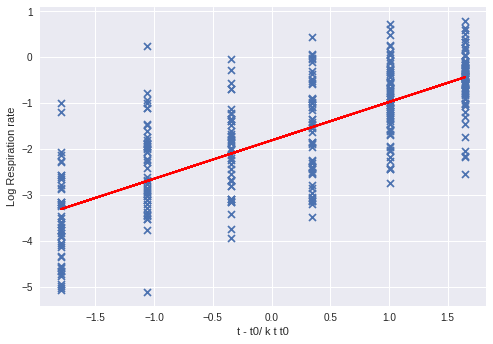

In [929]:
#sns.stripplot(x='x1', y='log_resp', data= workingdf, jitter=True) 
plt.scatter("x1", "log_resp", data=workingdf,  marker='x',  label = name)
plt.plot(x, x1_intercept + x*x1_coef, color='red')
plt.ylabel('Log Respiration rate')
plt.xlabel('t - t0/ k t t0')
plt.show()


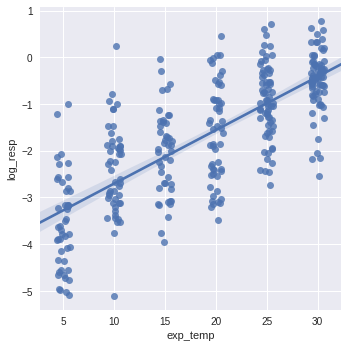

In [930]:
p = sns.lmplot(x = "exp_temp", y = "log_resp", data= workingdf, x_jitter= 0.7)

## On x2

In [931]:
x2 = data[:,9]

In [932]:
regr.fit(x2, y)

x2_slope, x2_intercept1, x2_r_value, x2_p_value, x2_std_err = stats.mstats.linregress(x2,y)
print (x2_slope)
print (x2_intercept1)
print (x2_r_value **  2)

-0.8352034479495631
31.53288845433281
0.561343768574


/home/abi/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/scipy/stats/_stats_mstats_common.py:116: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/abi/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/scipy/stats/_stats_mstats_common.py:118: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [933]:
predicted = cross_val_predict(regr, x2, y, cv=10)

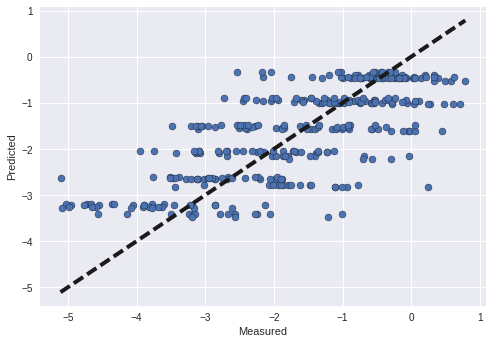

Coefficients: 
 -0.83520344795
Intercept: 
 31.5328884543
Mean squared error: 0.84
Variance score: 0.53


In [934]:
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


# The coefficients
print('Coefficients: \n', regr.coef_[0,0])
#Intercept
print('Intercept: \n', regr.intercept_[0])
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, predicted))

x2_coef = regr.coef_[0,0]
x2_intercept = regr.intercept_[0]

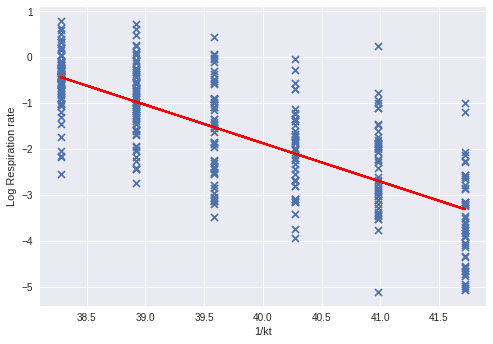

In [935]:
#sns.stripplot(x='x1', y='log_resp', data= workingdf, jitter=True) 
plt.scatter("x2", "log_resp", data=workingdf,  marker='x',  label = name)
plt.plot(x2, x2_intercept + x2*x2_coef, color='red')
plt.ylabel('Log Respiration rate')
plt.xlabel('1/kt')
plt.show()

# Incorporating mass 


ln(resp * mass ^ -3/4) = ln(B0) - E (1/kT)

In [936]:
y2 = data[:, 10]

In [937]:
regr.fit(x2, y2)
mass_resp_slope, mass_resp_intercept, mass_resp_r_value, mass_resp_p_value, mass_resp_std_err = stats.mstats.linregress(x2,y2)
print (mass_resp_slope)
print (mass_resp_intercept)
print (mass_resp_r_value **  2)

-0.7997718691430502
33.67465060946479
0.739802060674


/home/abi/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/scipy/stats/_stats_mstats_common.py:116: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/abi/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/scipy/stats/_stats_mstats_common.py:118: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [938]:
predicted = cross_val_predict(regr, x2, y2, cv=10)

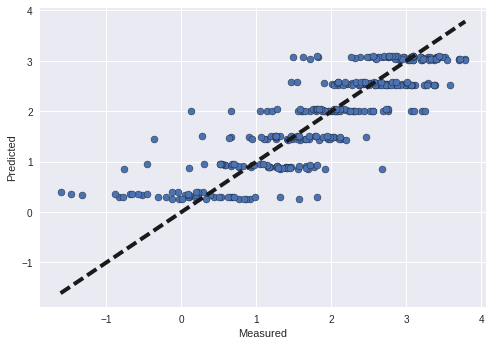

Coefficients: 
 -0.799771869143
Intercept: 
 33.6746506095
Mean squared error: 0.33
Variance score: 0.73


In [939]:
fig, ax = plt.subplots()
ax.scatter(y2, predicted, edgecolors=(0, 0, 0))
ax.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


# The coefficients
print('Coefficients: \n', regr.coef_[0,0])
#Intercept
print('Intercept: \n', regr.intercept_[0])
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y2, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y2, predicted))

mass_resp_coef = regr.coef_[0,0]
mass_resp_intercept = regr.intercept_[0]

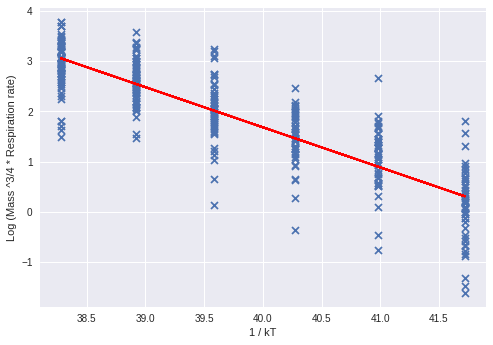

In [940]:
plt.scatter("x2", "log_mass_resp", data=workingdf,  marker='x',  label = name)
plt.plot(x2, mass_resp_intercept + (x2*mass_resp_coef), color='red')
plt.ylabel('Log (Mass ^3/4 * Respiration rate)')
plt.xlabel('1 / kT')
plt.show()

In [941]:
intercept_mass_resp_0C = mass_resp_intercept + mass_resp_coef*(1/(k*273.15))
mass_resp_at_10 = mass_resp_coef*(1/(k*283.15)) + mass_resp_intercept
mass_coef_in_C = (mass_resp_at_10 - intercept_mass_resp_0C) / 10
print(intercept_mass_resp_0C, mass_resp_at_10, mass_coef_in_C)
print ("The coefficient of this line is:\n",mass_coef_in_C,"\nand the intercept is: \n",intercept_mass_resp_0C)

-0.302908749283 0.897075688603 0.119998443789
The coefficient of this line is:
 0.119998443789 
and the intercept is: 
 -0.302908749283


# ln(mass) by ln(I0 e ^ (E/kt))

In [942]:
workingdf = workingdf.assign(lnIEkt = lambda x: np.log(x.resp) * (0.63/( k * workingdf["Exp_Temp_K"])) )
data = np.matrix(np.asarray(workingdf))
lnm, lnE = data[:, 12], data[:, 13]
workingdf

,stream,stream_temp,exp_temp,mass,resp,Exp_Temp_K,log_resp,mass_g,x1,x2,log_mass_resp,lnmass,x3,lnIEkt
0,11,5.6,5,3.014683,0.010438,278.15,-4.562267,0.003015,-1.794270,41.720374,-0.209072,-5.804261,3.595182,-119.913878
1,11,5.6,5,3.014683,0.016002,278.15,-4.135015,0.003015,-1.794270,41.720374,0.218180,-5.804261,3.595182,-108.684057
2,11,5.6,5,11.716683,0.039203,278.15,-3.239007,0.011717,-1.794270,41.720374,0.096049,-4.446742,3.595182,-85.133520
3,11,5.6,5,11.716683,0.042461,278.15,-3.159176,0.011717,-1.794270,41.720374,0.175880,-4.446742,3.595182,-83.035262
4,11,5.6,5,13.338753,0.042687,278.15,-3.153868,0.013339,-1.794270,41.720374,0.083943,-4.317082,3.595182,-82.895751
5,11,5.6,5,13.338753,0.076883,278.15,-2.565466,0.013339,-1.794270,41.720374,0.672345,-4.317082,3.595182,-67.430287
6,11,5.6,5,23.529307,0.366810,278.15,-1.002910,0.023529,-1.794270,41.720374,1.809221,-3.749509,3.595182,-26.360320
7,11,5.6,10,16.986706,0.198874,283.15,-1.615086,0.016987,-1.057552,40.983656,1.441407,-4.075324,3.531697,-41.701038
8,11,5.6,10,21.959874,0.143871,283.15,-1.938837,0.021960,-1.057552,40.983656,0.925067,-3.818538,3.531697,-50.060202
9,11,5.6,10,29.566405,0.227699,283.15,-1.479730,0.029566,-1.057552,40.983656,1.161108,-3.521117,3.531697,-38.206187


In [943]:
regr.fit(lnm, lnE)
lnm_slope, lnm_intercept, lnm_r_value, lnm_p_value, lnm_std_err = stats.mstats.linregress(lnm, lnE)
print (lnm_slope)
print (lnm_intercept)
print (lnm_r_value **  2)

-257.5980291185379
839.8957137145046
0.585052545051


/home/abi/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/scipy/stats/_stats_mstats_common.py:116: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/abi/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/scipy/stats/_stats_mstats_common.py:118: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


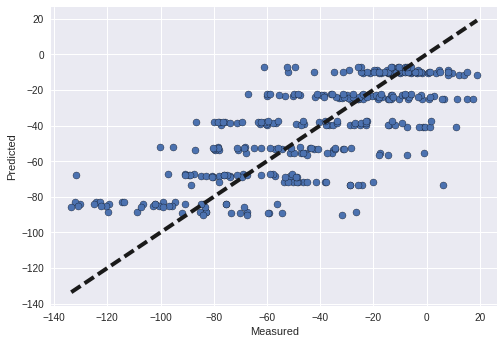

Coefficients: 
 -257.598029119
Intercept: 
 839.895713715
Mean squared error: 536.98
Variance score: 0.55


In [944]:
predicted = cross_val_predict(regr, lnm, lnE, cv=10)

fig, ax = plt.subplots()
ax.scatter(lnE, predicted, edgecolors=(0, 0, 0))
ax.plot([lnE.min(), lnE.max()], [lnE.min(), lnE.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


# The coefficients
print('Coefficients: \n', regr.coef_[0,0])
#Intercept
print('Intercept: \n', regr.intercept_[0])
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(lnE, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(lnE, predicted))

lnm_coef = regr.coef_[0,0]
lnm_intercept = regr.intercept_[0]

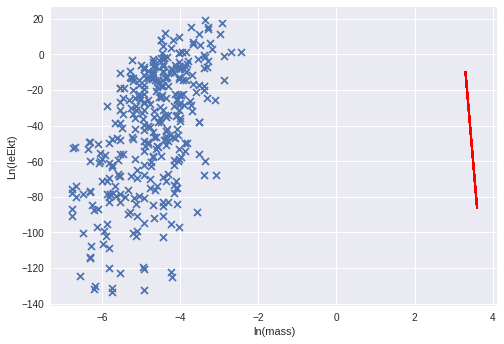

In [945]:
plt.scatter("lnmass", "lnIEkt", data=workingdf,  marker='x',  label = name)
plt.plot(lnm, lnm_intercept + lnm*lnm_slope, color='red')
plt.ylabel('Ln(IeEkt)')
plt.xlabel('ln(mass)')
plt.show()

## plotting x2 linear model

-3.9499483698 -2.69680209313 0.125314627668
The coefficient of this line is:
 0.125314627668 
and the intercept is: 
 -3.9499483698


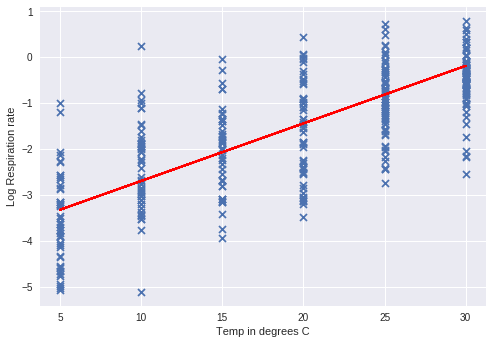

In [946]:
intercept_x2_0C = x2_intercept + x2_coef*(1/(k*273.15))
resp_at_10 = x2_coef*(1/(k*283.15)) + x2_intercept
coef_in_C = (resp_at_10 - intercept_x2_0C) / 10
print(intercept_x2_0C, resp_at_10, coef_in_C)
print ("The coefficient of this line is:\n",coef_in_C,"\nand the intercept is: \n",intercept_x2_0C)

plt.scatter("exp_temp", "log_resp", data=workingdf,  marker='x',  label = name)
plt.plot(workingdf["exp_temp"], intercept_x2_0C + workingdf["exp_temp"]*coef_in_C, color='red')
plt.ylabel('Log Respiration rate')
plt.xlabel('Temp in degrees C')
plt.show()



In [947]:
print ("1/kt r^2 value is: \n", (x2_r_value)**2)
print ("Tt - T0/kTtT0 r^2 value is: \n", (x1_r_value)**2)
print ("Including mass in 1/kt, r^2 is: \n", (mass_resp_r_value)**2, "\nand finally, the ln(mass) r^2 value is: \n", lnm_r_value**2)
print(x1_coef * ev[0])
print(x2_coef * ev[0])


1/kt r^2 value is: 
 0.561343768574
Tt - T0/kTtT0 r^2 value is: 
 0.561343768574
Including mass in 1/kt, r^2 is: 
 0.739802060674 
and finally, the ln(mass) r^2 value is: 
 0.585052545051
5.21292994244e+18
-5.21292994244e+18


0.8522580284477265
2.361276258292561
0.308681317239


/home/abi/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/scipy/stats/_stats_mstats_common.py:116: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/abi/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/scipy/stats/_stats_mstats_common.py:118: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


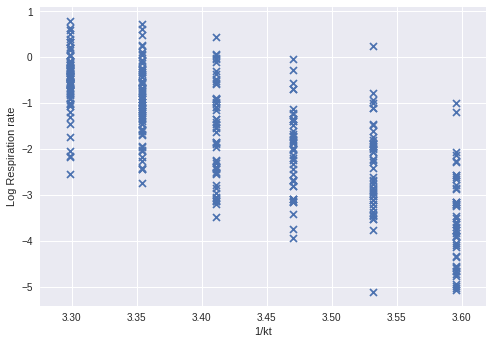

In [948]:
kt = data[:, 11]

regr.fit(kt, y)

kt_slope, kt_intercept1, kt_r_value, kt_p_value, kt_std_err = stats.mstats.linregress(kt,y)
print (kt_slope)
print (kt_intercept1)
print (kt_r_value **  2)

#sns.stripplot(x='x1', y='log_resp', data= workingdf, jitter=True) 
plt.scatter("x3", "log_resp", data=workingdf,  marker='x',  label = name)
#plt.plot(x2, x2_intercept + x2*x2_coef, color='red')
plt.ylabel('Log Respiration rate')
plt.xlabel('1/kt')
plt.show()